Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [101]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/ivanjuren/PycharmProjects/MachineLearning/venv/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['size', 'poly', 'random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [102]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [103]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
fi



array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [104]:
from numpy import linalg
w = np.matmul(np.matmul(linalg.inv(np.matmul(fi.transpose(), fi)), fi.transpose()), y)
w_pinv = linalg.pinv(fi).dot(y)

print("Izvenen nacin", w)
print("Moore-Penrose", w_pinv)

Izvenen nacin [2.2        0.45714286]
Moore-Penrose [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

E: 2.042857142857143


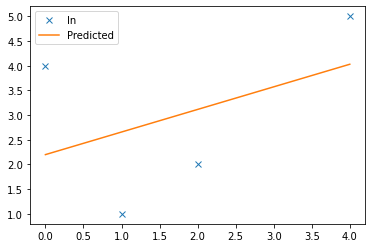

In [105]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
y_pred = np.dot(fi, w) #[np.matmul(x.transpose(),w) for x in fi]
E = mean_squared_error(y_pred,y)

plt.plot(X, y, 'x', label='In')
plt.plot(X, y_pred, '-', label='Predicted')
plt.legend()

print("E:", E)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [106]:
# Vaš kôd ovdje
#linalg.det(fi)
#linalg.inv(fi)
#w=np.matmul(linalg.inv(fi),y)

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [107]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(fi,y)
print("Centirano na (x0):", reg.intercept_) #racuna se centriranje
print("w0, w1:", reg.coef_) #w
print("E", mean_squared_error(y,reg.predict(fi))); #E(h|D)

Centirano na (x0): 2.2
w0, w1: [0.         0.45714286]
E 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [108]:
from numpy.random import normal, random
# def make_labels(X, f, noise=0):
#     y = []
#     for x in X:
#         y.append(f(x) + np.random.normal(0, noise))
#     return y

def make_labels(X, f, noise=0):
  return [f(x) + np.random.normal(0,noise) for x in X]


In [109]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [110]:
# Vaš kôd ovdje
X=make_instances(-5, 5, 50)
y=make_labels(X, lambda x:5+x-2*x**2-5*x**3, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

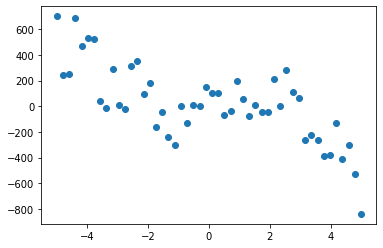

In [111]:
# Vaš kôd ovdje
plt.scatter(X,y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

E: 29072.560493425353


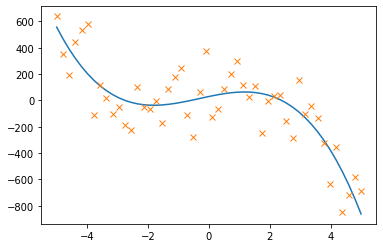

In [112]:
X=make_instances(-5, 5, 50)
y=make_labels(X, lambda x:5+x-2*x**2-5*x**3, 200)

# Vaš kôd ovdje
def trainAndPlot(i,X,y,plot=True):
    poly=PolynomialFeatures(i)
    D=poly.fit_transform(X)
    D_inverse=linalg.pinv(D)
    w=np.matmul(D_inverse,y)

    y_pred=np.dot(D,w)
    if plot:
        plt.plot(X,y_pred,'-')
    return mean_squared_error(y,y_pred)

E=trainAndPlot(3,X,y)
plt.plot(X,y,'x')
print("E:",E)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

1  : 57145.197256525724
3  : 49470.03556299542
5  : 48189.04165998506
10  : 30131.875143056615
20  : 21634.462415680227


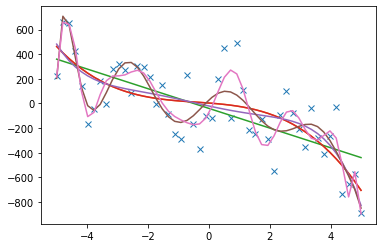

In [113]:
X=make_instances(-5, 5, 50)
y=make_labels(X, lambda x:5+x-2*x**2-5*x**3, 200)

plt.plot(X,y,'x')
trainAndPlot(3,X,y)
for i in [1,3,5,10,20]:
    print(i," :",trainAndPlot(i,X,y))

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

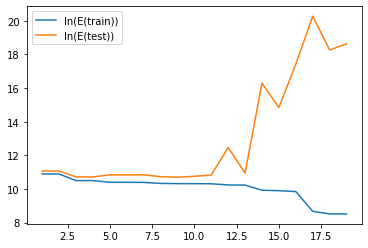

In [114]:
import math
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
N=50
X=make_instances(-5, 5, N)
y=make_labels(X, lambda x:5+x-2*x**2-5*x**3, 200)
d_range=range(1,20)

def train(i,X,y):
    poly=PolynomialFeatures(i)
    D=poly.fit_transform(X)
    D_inverse=linalg.pinv(D)
    return np.dot(D_inverse,y)

errs=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
for i in d_range:
    w=train(i,X_train,y_train)
    poly=PolynomialFeatures(i)

    D_train=poly.fit_transform(X_train)
    D_test=poly.fit_transform(X_test)

    E_train=mean_squared_error(y_train,np.dot(D_train,w))
    E_test=mean_squared_error(y_test,np.dot(D_test,w))
    errs.append((E_train,E_test))

plt.plot(d_range,[math.log(x[0]) for x in errs],label="ln(E(train))")
plt.plot(d_range,[math.log(x[1]) for x in errs],label="ln(E(test))")
plt.legend()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

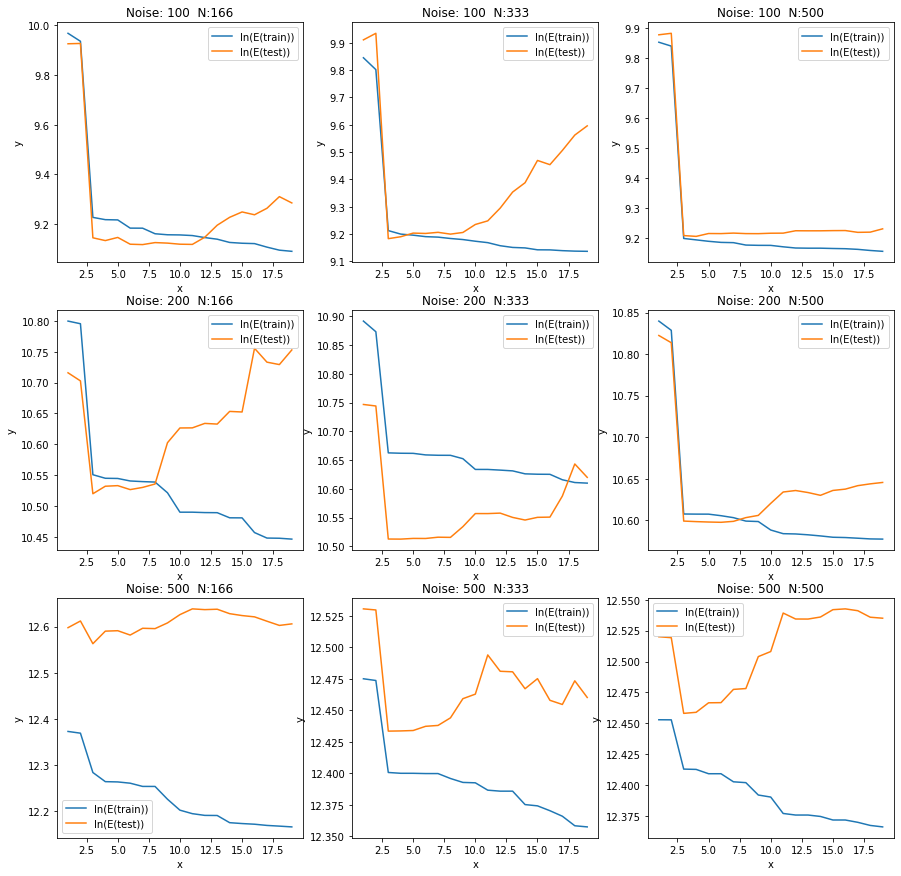

In [115]:
def train(i,X,y):
    poly=PolynomialFeatures(i)
    D=poly.fit_transform(X)
    D_inverse=linalg.pinv(D)
    return np.dot(D_inverse,y)

# Vaš kôd ovdje
N = 1000 # broj primjera
noises = [100,200,500]
part_of_dataset = [0.333,0.666,1]
f = lambda x:5 + x -2 * x**2 - 5*x**3
d_range = range(1, 20)
train_to_test_ratio=0.5

X=make_instances(-5, 5, N)
fig, axs = plt.subplots(len(noises),len(part_of_dataset),figsize=(15,15))

for (i,noise) in enumerate(noises):
    y=make_labels(X, f , noise)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_to_test_ratio, random_state=42)

    for (j,part) in enumerate(part_of_dataset):
        size=int(N*part*train_to_test_ratio)

        X_train_subPart=X_train[0:size]
        X_test_subPart=X_test[0:size]
        y_train_subPart=y_train[0:size]
        y_test_subPart=y_test[0:size]

        errs=[]
        for d in d_range:
            w=train(d,X_train_subPart,y_train_subPart)
            poly=PolynomialFeatures(d)

            D_train=poly.fit_transform(X_train_subPart)
            D_test=poly.fit_transform(X_test_subPart)

            E_train=mean_squared_error(y_train_subPart,np.dot(D_train,w))
            E_test=mean_squared_error(y_test_subPart,np.dot(D_test,w))
            errs.append((E_train,E_test))

        plt.subplot(len(noises),len(part_of_dataset),i*len(part_of_dataset)+j+1)
        plt.plot(d_range,[math.log(x[0]) for x in errs],label="ln(E(train))")
        plt.plot(d_range,[math.log(x[1]) for x in errs],label="ln(E(test))")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Noise: "+ str(noise) + "  N:"+str(size))
        plt.legend()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [116]:
def getLamdaMatrix(lamda,order):
    matrix= np.identity(order)
#    matrix[0][0]=0
    return matrix * lamda


X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(3)
fi = poly.fit_transform(X)

for i in [0,1,10]:
    lamda=getLamdaMatrix(i,4)
    w = np.matmul(np.matmul(linalg.inv(np.matmul(fi.transpose(), fi) + lamda), fi.transpose()), y)
    w_pinv = linalg.pinv(fi).dot(y)

    print("lamda ",i,"   regularizirano w:", w)
print("\nlamda ",i," neregularizirana w:", w_pinv)

lamda  0    regularizirano w: [ 4.         -5.91666667  3.375      -0.45833333]
lamda  1    regularizirano w: [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
lamda  10    regularizirano w: [0.43312265 0.11060671 0.13827839 0.03093411]

lamda  10  neregularizirana w: [ 4.         -5.91666667  3.375      -0.45833333]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [117]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
D = PolynomialFeatures(3).fit_transform(X)

for lamda in [0,1,10]:
    ridge = Ridge(lamda,fit_intercept=False)
    fitted = ridge.fit(D,y)
    w=ridge.coef_
    w[0]=ridge.intercept_
    print("w0,w1,w2:",w)

w0,w1,w2: [ 0.         -5.91666667  3.375      -0.45833333]
w0,w1,w2: [ 0.         -0.24729075 -0.0175289   0.07014758]
w0,w1,w2: [0.         0.11060671 0.13827839 0.03093411]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

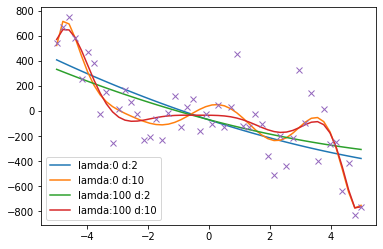

In [118]:
# Vaš kôd ovdje
N = 50
lamdas=[0,100]
d_range=[2,10]

X=make_instances(-5, 5, N)
y=make_labels(X, lambda x:5+x-2*x**2-5*x**3, 200)
for lamda in lamdas:
    ridge = Ridge(alpha=lamda)
    for d in d_range:
        D=PolynomialFeatures(d).fit_transform(X)
        fitted = ridge.fit(D,y)
        # w=fitted.coef_
        # plt.plot(X,np.dot(D,w.transpose()),label="lamda:" + str(lamda) + " d:" + str(d))
        plt.plot(X,fitted.predict(D),label="lamda:" + str(lamda) + " d:" + str(d))
plt.plot(X,y,"x")
plt.legend()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


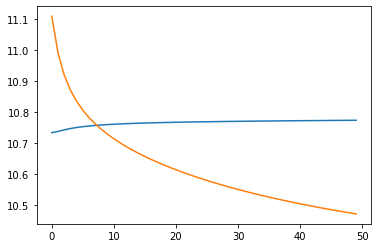

In [119]:
# Vaš kôd ovdje
N = 50
lamda_range=range(0,50)
d=10

X=make_instances(-5, 5, N)
y=make_labels(X, lambda x:5+x-2*x**2-5*x**3, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

D_train=PolynomialFeatures(d).fit_transform(X_train)
D_test=PolynomialFeatures(d).fit_transform(X_test)

errs=[]
for lamda in lamda_range:
    ridge=Ridge(lamda)
    D_train=PolynomialFeatures(d).fit_transform(X_train)
    D_test=PolynomialFeatures(d).fit_transform(X_test)
    ridge.fit(D_train,y_train)
    err_train=mean_squared_error(y_train,ridge.predict(D_train))
    err_test=mean_squared_error(y_test,ridge.predict(D_test))
    errs.append((err_train,err_test))

plt.plot(lamda_range,[math.log(x[0]) for x in errs],label="ln(E(train))")
plt.plot(lamda_range,[math.log(x[1]) for x in errs],label="ln(E(test))")



### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [120]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

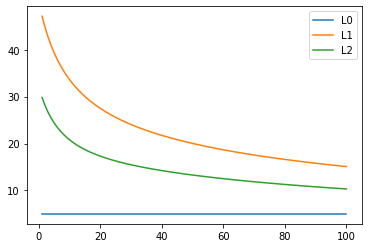

In [121]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

N=50
X=make_instances(-5, 5, N)
y=make_labels(X, lambda x:5+x-2*x**2-5*x**3, 200)
lamda_range=range(1,101)
d=5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

D_train=PolynomialFeatures(d).fit_transform(X_train)

norm_l0=[]
norm_l1=[]
norm_l2=[]
for lamda in lamda_range:
    #ridge=Ridge(lamda,fit_intercept=False)
    ridge=Ridge(lamda)
    ridge.fit(D_train,y_train)
    Norm1 =0
    Norm2 =0
    for w in ridge.coef_[0]:
        Norm1+=abs(w)
        Norm2+=w*w
    norm_l0.append(nonzeroes(ridge.coef_[0]))
    norm_l1.append(Norm1)
    norm_l2.append(math.sqrt(Norm2))

plt.plot(lamda_range,norm_l0,"-",label="L0")
plt.plot(lamda_range,norm_l1,"-",label="L1")
plt.plot(lamda_range,norm_l2,"-",label="L2")
plt.legend();


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

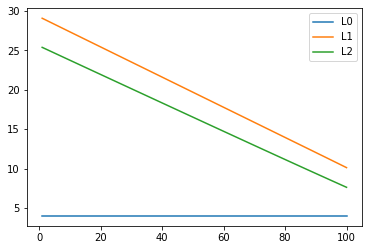

In [122]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
N=50
X=make_instances(-5, 5, N)
y=make_labels(X, lambda x:5+x-2*x**2-5*x**3, 200)
lamda_range=range(1,101)
d=5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

D_train=PolynomialFeatures(d).fit_transform(X_train)

norm_l0=[]
norm_l1=[]
norm_l2=[]
for lamda in lamda_range:
    #ridge=Ridge(lamda,fit_intercept=False)
    lasso=Lasso(lamda)
    lasso.fit(D_train,y_train)
    Norm1 =0
    Norm2 =0
    for w in lasso.coef_:
        Norm1+=abs(w)
        Norm2+=w*w
    norm_l0.append(nonzeroes(lasso.coef_))
    norm_l1.append(Norm1)
    norm_l2.append(math.sqrt(Norm2))

plt.plot(lamda_range,norm_l0,"-",label="L0")
plt.plot(lamda_range,norm_l1,"-",label="L1")
plt.plot(lamda_range,norm_l2,"-",label="L2")
plt.legend();



### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [123]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * exam_influence + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

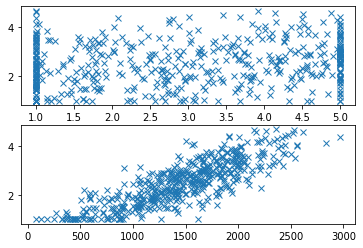

In [124]:
# Vaš kôd ovdje
plt.subplot(2,1,1)
plt.plot(grade_in_highschool,grades_y,"x")
plt.subplot(2,1,2)
plt.plot(exam_score,grades_y,"x")


### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [125]:
# Vaš kôd ovdje

ridge=Ridge(0.01,fit_intercept=False).fit(grades_X,grades_y)
print(ridge.coef_)


[0.00147711 0.1106004 ]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [126]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

grades_X_fixed=StandardScaler().fit(grades_X).transform(grades_X)
grades_y_fixed=StandardScaler().fit_transform(grades_y.reshape(-1,1))

ridge1=Ridge(0.01,fit_intercept=False).fit(grades_X_fixed,grades_y)
ridge2=Ridge(0.01,fit_intercept=False).fit(grades_X_fixed,grades_y_fixed)
print(ridge1.coef_)
print(ridge2.coef_)



[0.73954683 0.13741539]
[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [127]:
# Vaš kôd ovdje
grades_X_fixed_colinear = []
for entry in grades_X_fixed:
    grades_X_fixed_colinear.append([entry[0],entry[1],entry[1]])


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [128]:
# Vaš kôd ovdje
ridge=Ridge(0.01,fit_intercept=False).fit(grades_X_fixed_colinear,grades_y_fixed)
print(ridge.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [129]:
# Vaš kôd ovdje
N = 10
lamdas=[0.01,1000]
total_size=len(grades_X_fixed_colinear)

w=[ [] for x in lamdas]
for (i,lamda) in enumerate(lamdas):
    w[i]=[]
    for n in range(N):
        rnd_indexs=np.random.randint(0,total_size,int(total_size/2))
        sample_x=[grades_X_fixed_colinear[x] for x in rnd_indexs]
        sample_y=[grades_y_fixed[x] for x in rnd_indexs]

        ridge=Ridge(lamda,fit_intercept=False).fit(sample_x,sample_y)
        w[i].append(ridge.coef_)
        print("lamda:",lamda, " w:",ridge.coef_[0])

for (lamda_index,w_arrs) in enumerate(w):
    print("\nlamda",lamdas[lamda_index])
    print("w0",np.average([x[0][0] for x in w_arrs]), "+- ",np.std([x[0][0] for x in w_arrs]))
    print("w1",np.average([x[0][1] for x in w_arrs]), "+- ",np.std([x[0][1] for x in w_arrs]))
    print("w2",np.average([x[0][2] for x in w_arrs]), "+- ",np.std([x[0][2] for x in w_arrs]))


lamda: 0.01  w: [0.78707555 0.05994819 0.05994819]
lamda: 0.01  w: [0.84103568 0.10779491 0.10779491]
lamda: 0.01  w: [0.80014571 0.08889649 0.08889649]
lamda: 0.01  w: [0.84486261 0.05186824 0.05186824]
lamda: 0.01  w: [0.78843526 0.07918383 0.07918383]
lamda: 0.01  w: [0.80378707 0.06210232 0.06210232]
lamda: 0.01  w: [0.84208992 0.06203399 0.06203399]
lamda: 0.01  w: [0.84839679 0.07960845 0.07960845]
lamda: 0.01  w: [0.80835549 0.08027907 0.08027907]
lamda: 0.01  w: [0.90656018 0.06242431 0.06242431]
lamda: 1000  w: [0.18236356 0.02773204 0.02773204]
lamda: 1000  w: [0.15740592 0.02392804 0.02392804]
lamda: 1000  w: [0.18616208 0.03850607 0.03850607]
lamda: 1000  w: [0.16448172 0.03732943 0.03732943]
lamda: 1000  w: [0.15487568 0.03849646 0.03849646]
lamda: 1000  w: [0.15816845 0.04208042 0.04208042]
lamda: 1000  w: [0.1558678  0.02498697 0.02498697]
lamda: 1000  w: [0.17079161 0.01964895 0.01964895]
lamda: 1000  w: [0.18295165 0.04840235 0.04840235]
lamda: 1000  w: [0.16426941 0.0

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.